# **Global AI Hub Machine Learning Bootcamp - Content Based Movie Recommendation**

In [ ]:
import numpy as np
import pandas as pd
import os
import re
import json
import wordcloud
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tmdb/tmdb-movie-metadata")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/tmdb-movie-metadata


In [ ]:
# Paths do data:
# movies_path = "/root/.cache/kagglehub/datasets/tmdb/tmdb-movie-metadata/versions/2/tmdb_5000_movies.csv"
# credits_path = "/root/.cache/kagglehub/datasets/tmdb/tmdb-movie-metadata/versions/2/tmdb_5000_credits.csv"

movies_path = "/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv"
credits_path = "/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv"

# Read .csv files using Pandas
movies = pd.read_csv(movies_path)
credits = pd.read_csv(credits_path)

In [ ]:
# Taking a look to the first 5 rows of the data
print("Movies dataset (First 5 Columns):")
movies.head(5)

Movies dataset (First 5 Columns):


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
print("\nCredits dataset (First 5 Columns):")
credits.head(5)


Credits dataset (First 5 Columns):


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# Let's merge the data sets via the "id" column:
tmdb_df = movies.merge(credits, on="title")

# Let's look at the size of the merged dataset and its first rows:
print("Birleştirilmiş veri seti boyutu:", tmdb_df.shape)
tmdb_df.head()

Birleştirilmiş veri seti boyutu: (4809, 23)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# Controling missing values in the dataset
print("Null Values:")
print(tmdb_df.isnull().sum())

# Basic Statistics information about the data
print("\nDescriptive Statistics:")
tmdb_df.describe()

Null Values:
budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

Descriptive Statistics:


,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


In [ ]:
import ast

# Function to convert string expressions in the 'genres' column to dictionary/list type:
def parse_genres(genres_str):
    try:
        genres_list = ast.literal_eval(genres_str)
        return [genre['name'] for genre in genres_list]
    except:
        return []

# Let's create a new column and store the genre information of each movie as a list:
tmdb_df['genres_parsed'] = tmdb_df['genres'].apply(parse_genres)

# Example result
print(tmdb_df[['title', 'genres_parsed']].head())

                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                   genres_parsed  
0  [Action, Adventure, Fantasy, Science Fiction]  
1                   [Adventure, Fantasy, Action]  
2                     [Action, Adventure, Crime]  
3               [Action, Crime, Drama, Thriller]  
4           [Action, Adventure, Science Fiction]  


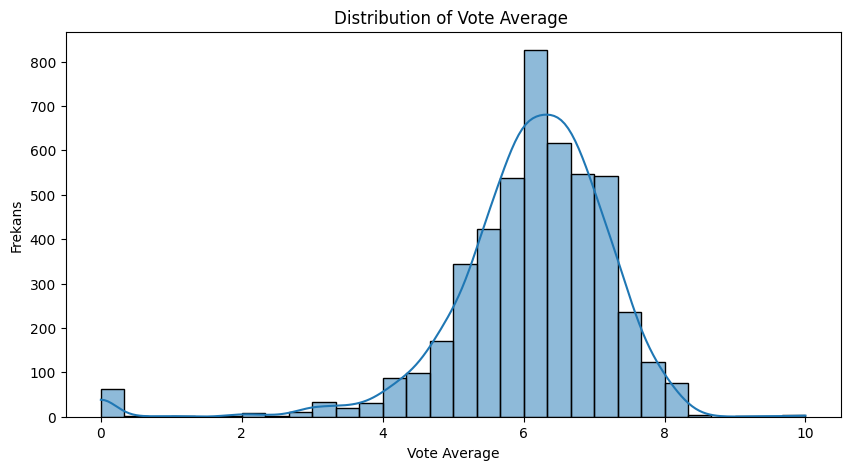

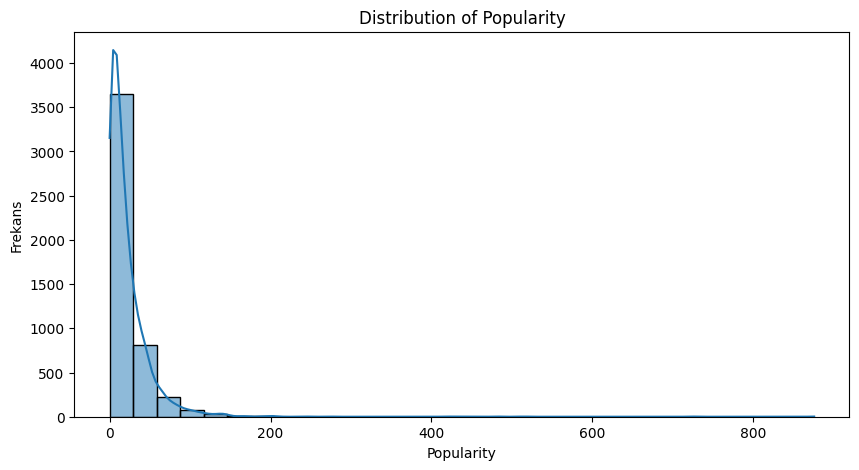

In [ ]:
# Distribution of vote average
plt.figure(figsize=(10,5))
sns.histplot(tmdb_df['vote_average'], bins=30, kde=True)
plt.title("Distribution of Vote Average ")
plt.xlabel("Vote Average")
plt.ylabel("Frekans")
plt.show()

# Distribution of popularity
plt.figure(figsize=(10,5))
sns.histplot(tmdb_df['popularity'], bins=30, kde=True)
plt.title("Distribution of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frekans")
plt.show()

In [ ]:
# Let's convert the column 'release_date' to datetime type:
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'], errors='coerce')

# Let's add the year information as a new column:
tmdb_df['release_year'] = tmdb_df['release_date'].dt.year

# First example:
print(tmdb_df[['title', 'release_date', 'release_year']].head())

                                      title release_date  release_year
0                                    Avatar   2009-12-10        2009.0
1  Pirates of the Caribbean: At World's End   2007-05-19        2007.0
2                                   Spectre   2015-10-26        2015.0
3                     The Dark Knight Rises   2012-07-16        2012.0
4                               John Carter   2012-03-07        2012.0


# Preprocessing the TMDB Dataset

In this section, we perform data preprocessing to remove unnecessary columns and prepare our data for further analysis. We remove columns that are not directly useful for building a recommendation model. For example, columns like `budget`, `homepage`, and `tagline` typically do not contribute to the recommendation logic and can be removed.

Additionally, you may choose to drop other columns that provide highly specific information (e.g. `production_companies`, `production_countries`, and `spoken_languages`) to simplify the dataset. However, if you plan to use them in future feature engineering or content-based filtering, you might want to keep a copy for further analysis.

In [ ]:
columns_to_drop = [
    'budget',                # Financial info that is less relevant for recommendation.
    'homepage',              # Not required for modeling.
    'production_companies',  # Detailed production info, can be dropped or processed separately.
    'production_countries',  # Similar reasoning as above.
    'spoken_languages',      # Language details, can be removed to simplify the dataset.
    'movie_id',              # unique id's for every movie
    'popularity',            # Popularity for each movie can be thought of as rotten tomatoes
    'revenue',               # Revenue information for each movie
    'status',                # information about if the movie is released or not
    'cast',                  # information about casting crew
    'crew'                   # additional information about casting crew
]

In [ ]:
# Drop the columns from the merged dataframe (tmdb_df)
tmdb_df_cleaned = tmdb_df.drop(columns=columns_to_drop)

In [ ]:
# Display the columns of the preprocessed dataframe to confirm the unnecessary columns have been removed.
print("Columns in the preprocessed dataset:")
print(tmdb_df_cleaned.columns.tolist())

Columns in the preprocessed dataset:
['genres', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'release_date', 'runtime', 'tagline', 'title', 'vote_average', 'vote_count', 'genres_parsed', 'release_year']


In [ ]:
tmdb_df_cleaned.head()

,genres,id,keywords,original_language,original_title,overview,release_date,runtime,tagline,title,vote_average,vote_count,genres_parsed,release_year
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",2009-12-10,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]",2009.0
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",2007-05-19,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]",2007.0
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,2015-10-26,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]",2015.0
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,2012-07-16,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]",2012.0
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",2012-03-07,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]",2012.0


In [ ]:
print("Cleaned dataset shape:", tmdb_df_cleaned.shape)

Cleaned dataset shape: (4809, 14)


In [ ]:
tmdb_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genres             4809 non-null   object        
 1   id                 4809 non-null   int64         
 2   keywords           4809 non-null   object        
 3   original_language  4809 non-null   object        
 4   original_title     4809 non-null   object        
 5   overview           4806 non-null   object        
 6   release_date       4808 non-null   datetime64[ns]
 7   runtime            4807 non-null   float64       
 8   tagline            3965 non-null   object        
 9   title              4809 non-null   object        
 10  vote_average       4809 non-null   float64       
 11  vote_count         4809 non-null   int64         
 12  genres_parsed      4809 non-null   object        
 13  release_year       4808 non-null   float64       
dtypes: datet

In [ ]:
print(tmdb_df_cleaned.isnull().sum())

genres                 0
id                     0
keywords               0
original_language      0
original_title         0
overview               3
release_date           1
runtime                2
tagline              844
title                  0
vote_average           0
vote_count             0
genres_parsed          0
release_year           1
dtype: int64


In [ ]:
# Process overview: Fill missing values (if any) and convert to lowercase
tmdb_df_cleaned['overview'] = tmdb_df_cleaned['overview'].fillna("").str.lower()

In [ ]:
# Process tagline: Fill missing values (if any) and convert to lowercase
tmdb_df_cleaned['tagline'] = tmdb_df_cleaned['tagline'].fillna("").str.lower()

In [ ]:
# Optionally, include vote_average as a string (if you want to weight by it)
tmdb_df_cleaned['vote_average_str'] = tmdb_df_cleaned['vote_average'].astype(str)

In [ ]:
tmdb_df_cleaned.isnull().sum()

,0
genres,0
id,0
keywords,0
original_language,0
original_title,0
overview,0
release_date,1
runtime,2
tagline,0
title,0


## Combined Feature String

In this step, instead of creating only the 'keywords_taglines_genres' column, we also add 'overview' (and optionally the string representation of vote_average) to our existing textual information to form a single combined text column. In this way, we obtain a richer representation that simultaneously utilizes the movie's content, synopsis, tags, and genre information.

In [ ]:
# English comments
# Use parsed genres list instead of raw JSON to avoid tokens like '{', '"', ids.
tmdb_df_cleaned['combined_text'] = (
    tmdb_df_cleaned['genres_parsed'].apply(lambda lst: ' '.join(lst)) + " " +
    tmdb_df_cleaned['tagline'] + " " +
    tmdb_df_cleaned['overview'] + " " +
    tmdb_df_cleaned['vote_average_str']
)

In [ ]:
# Preview the combined feature column
print(tmdb_df_cleaned[['original_title', 'combined_text']].head())

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                       combined_text  
0  Action Adventure Fantasy Science Fiction enter...  
1  Adventure Fantasy Action at the end of the wor...  
2  Action Adventure Crime a plan no one escapes a...  
3  Action Crime Drama Thriller the legend ends fo...  
4  Action Adventure Science Fiction lost in our w...  


# 1. Filtering Top 100 Similar Movies by "keywords", "tagline", "genres"

## 1.1 Cosine Similarity Calculation and Initial Filtering by 'combined_text'

In this phase, we obtain a text matrix using either CountVectorizer or TfidfVectorizer on the combined text column. Then, cosine similarity is computed on this matrix. Cosine similarity calculates the cosine of the angle between two vectors and its value ranges between 0 and 1 (negative values are generally not encountered in text similarity).

The mathematical formula is:

cosine_similarity = (A . B) / (||A|| ||B||)

Here 𝐴 and 𝐵 is the TF/IDF vectors of the texts. Measuring the angle between vectors is highly effective in determining content similarity.





In [ ]:
# Create a vectorizer; Here we are using CountVectorizer, but TfidfVectorizer is also preferable.
# vectorizer = CountVectorizer(stop_words='english')

In [ ]:
# Fit and transform the combined text column
# combined_matrix = vectorizer.fit_transform(tmdb_df_cleaned['combined_text'])

In [ ]:
tfidf_primary = TfidfVectorizer(
    stop_words='english',
    max_features=5_000,      # keep top 5k terms by TF-IDF score
    ngram_range=(1,2)        # optionally include bigrams
)
tfidf_primary_matrix = tfidf_primary.fit_transform(
    tmdb_df_cleaned['combined_text']
)

In [ ]:
# Compute cosine similarity matrix on the combined feature matrix
cosine_sim_matrix = cosine_similarity(
    tfidf_primary_matrix,
    tfidf_primary_matrix
)

In [ ]:
# Create a reverse mapping from movie title to index for later lookup
indices = pd.Series(tmdb_df_cleaned.index, index=tmdb_df_cleaned['original_title']).drop_duplicates()

In [ ]:
# Initial filtering function: Given a movie title, retrieve the top N most similar movies based on cosine similarity
def get_initial_recommendations(title, top_n=100):
    if title not in indices:
        return "Title not found in dataset."
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    # Sort movies by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Exclude the movie itself (first element) and select top_n movies
    sim_scores = sim_scores[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]
    return tmdb_df_cleaned.iloc[movie_indices]

In [ ]:
initial_recs = get_initial_recommendations("Iron Man", top_n=100)
initial_recs[['original_title', 'release_year', 'vote_average', 'keywords', 'tagline']].head(10)

,original_title,release_year,vote_average,keywords,tagline
79,Iron Man 2,2010.0,6.6,"[{""id"": 8613, ""name"": ""malibu""}, {""id"": 8828, ...","it's not the armor that makes the hero, but th..."
7,Avengers: Age of Ultron,2015.0,7.3,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",a new age has come.
31,Iron Man 3,2013.0,6.8,"[{""id"": 949, ""name"": ""terrorist""}, {""id"": 5597...",unleash the power behind the armor.
94,Guardians of the Galaxy,2014.0,7.9,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",all heroes start somewhere.
538,Hostage,2005.0,6.2,"[{""id"": 1812, ""name"": ""fbi""}, {""id"": 1930, ""na...",every second counts
1291,Baahubali: The Beginning,2015.0,7.5,"[{""id"": 4152, ""name"": ""kingdom""}, {""id"": 6091,...",
4331,Beyond the Black Rainbow,2010.0,5.7,"[{""id"": 2412, ""name"": ""commune""}, {""id"": 9937,...",beyond science. beyond sanity. beyond control.
618,Mystery Men,1999.0,5.7,"[{""id"": 420, ""name"": ""bowling""}, {""id"": 1562, ...","we're not your classic heroes, we're the other..."
1870,Cradle 2 the Grave,2003.0,5.8,"[{""id"": 642, ""name"": ""robbery""}, {""id"": 1384, ...",mortal enemies make dangerous friends.
1071,Resident Evil: Extinction,2007.0,6.1,"[{""id"": 402, ""name"": ""clone""}, {""id"": 1852, ""n...",the extinction is coming...


## 1.1.1 - Saving ```combined_text``` based Model

In [ ]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

class ContentBasedRecommender:
    def __init__(self, vectorizer=None):
        # If no vectorizer passed, default to TF-IDF with sensible defaults
        self.vectorizer = vectorizer or TfidfVectorizer(
            stop_words='english',
            max_features=5_000,
            ngram_range=(1,2)
        )

    def fit(self, texts, titles):
        """
        texts: pd.Series of combined_text
        titles: pd.Series of movie titles (same index as texts)
        """
        self.titles = titles.reset_index(drop=True)
        # vectorize
        self.mat = self.vectorizer.fit_transform(texts)
        # precompute full cosine similarity matrix
        self.cosine_sim = cosine_similarity(self.mat, self.mat)
        # map title -> row index
        self.indices = pd.Series(self.titles.index, index=self.titles.values)
        return self

    def recommend(self, title, top_n=15):
        """
        title: string movie title
        top_n: how many similar movies to return
        returns: list of recommended titles
        """
        if title not in self.indices:
            return []
        idx = self.indices[title]
        sim_scores = list(enumerate(self.cosine_sim[idx]))
        # sort, exclude itself, take top_n
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
        rec_idxs = [i for i,_ in sim_scores]
        return self.titles.iloc[rec_idxs].tolist()

# --- Usage ---
# 1) First pick combine_text and original_title data
texts = tmdb_df_cleaned['combined_text']
titles = tmdb_df_cleaned['original_title']

# 2) Define Recommender and train it
rec = ContentBasedRecommender()
rec.fit(texts, titles)

# 3) Test recommender on 'Iron Man' movie
print("Recommendations for 'Iron Man':")
print(rec.recommend('Iron Man', top_n=15))

# 4) Save model as pickle file
with open('content_rec.pkl', 'wb') as f:
    pickle.dump(rec, f)
print("✅ ContentBasedRecommender saved to content_rec.pkl")

Recommendations for 'Iron Man':
['Iron Man 2', 'Avengers: Age of Ultron', 'Iron Man 3', 'Guardians of the Galaxy', 'Hostage', 'Baahubali: The Beginning', 'Beyond the Black Rainbow', 'Mystery Men', 'Cradle 2 the Grave', 'Resident Evil: Extinction', 'Unsullied', 'Journey to the Center of the Earth', 'Equilibrium', 'Dune', 'Street Fighter']
✅ ContentBasedRecommender saved to content_rec.pkl


## 1.2 Cosine Similarity and Initial Filtering by 'keywords', 'genre' and 'tagline'

Corresponding genres of the first movie in dataset (Avatar)

In [ ]:
tmdb_df_cleaned.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

Keywords of the first movie in dataset (Avatar)

In [ ]:
tmdb_df_cleaned.keywords[0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

Tagline of the first movie in dataset (Avatar)

In [ ]:
tmdb_df_cleaned.tagline[0]

'enter the world of pandora.'

In [ ]:
tmdb_keywords_tagline_genres = tmdb_df_cleaned[['id', 'original_title']]

In [ ]:
tmdb_keywords_tagline_genres.head()

,id,original_title
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End
2,206647,Spectre
3,49026,The Dark Knight Rises
4,49529,John Carter


For better vectorization we turn every uppercase letter to lowercase letter and also combining every word in each sequence.

In [ ]:
tmdb_keywords_tagline_genres["genres_combined"] = tmdb_df_cleaned.genres.apply(lambda row: ' '.join([x['name'].lower() for x in json.loads(row)]))
tmdb_keywords_tagline_genres["keywords_combined"] = tmdb_df_cleaned.keywords.apply(lambda row: ' '.join([x['name'].lower() for x in json.loads(row)]))
tmdb_keywords_tagline_genres["tagline_processed"] = tmdb_df_cleaned.tagline.apply(lambda row: row.lower())

In [ ]:
tmdb_keywords_tagline_genres["keywords_taglines_genres"] = tmdb_keywords_tagline_genres.apply((lambda row: ' ' . join([row.genres_combined, row.keywords_combined, row.tagline_processed])), axis=1)

In [ ]:
tmdb_keywords_tagline_genres.head()

,id,original_title,genres_combined,keywords_combined,tagline_processed,keywords_taglines_genres
0,19995,Avatar,action adventure fantasy science fiction,culture clash future space war space colony so...,enter the world of pandora.,action adventure fantasy science fiction cultu...
1,285,Pirates of the Caribbean: At World's End,adventure fantasy action,ocean drug abuse exotic island east india trad...,"at the end of the world, the adventure begins.",adventure fantasy action ocean drug abuse exot...
2,206647,Spectre,action adventure crime,spy based on novel secret agent sequel mi6 bri...,a plan no one escapes,action adventure crime spy based on novel secr...
3,49026,The Dark Knight Rises,action crime drama thriller,dc comics crime fighter terrorist secret ident...,the legend ends,action crime drama thriller dc comics crime fi...
4,49529,John Carter,action adventure science fiction,based on novel mars medallion space travel pri...,"lost in our world, found in another.",action adventure science fiction based on nove...


In [ ]:
tmdb_keywords_tagline_genres = tmdb_keywords_tagline_genres.sort_values("id")
tmdb_keywords_tagline_genres = tmdb_keywords_tagline_genres.reset_index(drop=True)

In [ ]:
tmdb_keywords_tagline_genres.head()

,id,original_title,genres_combined,keywords_combined,tagline_processed,keywords_taglines_genres
0,5,Four Rooms,crime comedy,hotel new year's eve witch bet hotel room sper...,twelve outrageous guests. four scandalous requ...,crime comedy hotel new year's eve witch bet ho...
1,11,Star Wars,adventure action science fiction,android galaxy hermit death star lightsaber je...,"a long time ago in a galaxy far, far away...",adventure action science fiction android galax...
2,12,Finding Nemo,animation family,father son relationship harbor underwater fish...,"there are 3.7 trillion fish in the ocean, they...",animation family father son relationship harbo...
3,13,Forrest Gump,comedy drama romance,vietnam veteran hippie mentally disabled runni...,"the world will never be the same, once you've ...",comedy drama romance vietnam veteran hippie me...
4,14,American Beauty,drama,male nudity female nudity adultery midlife cri...,look closer.,drama male nudity female nudity adultery midli...


In [ ]:
tmdb_keywords_tagline_genres.keywords_taglines_genres

,keywords_taglines_genres
0,crime comedy hotel new year's eve witch bet ho...
1,adventure action science fiction android galax...
2,animation family father son relationship harbo...
3,comedy drama romance vietnam veteran hippie me...
4,drama male nudity female nudity adultery midli...
...,...
4804,horror the hot spot where satan's waitin'.
4805,comedy family drama it’s better to stand out ...
4806,thriller drama christian film sex trafficking ...
4807,family


Vectorizing the complete ```tmdb_keywords_tagline_genres``` dataframe

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
vectorized = vectorizer.fit_transform(tmdb_keywords_tagline_genres.keywords_taglines_genres)

In [ ]:
vectorized.toarray().shape

(4809, 9220)

In [ ]:
vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
top10words = vectorizer.get_feature_names_out()
top10words

array(['000', '007', '05', ..., '最后的舞者', '绝地奶霸', '超级妈妈'], dtype=object)

In [ ]:
top_freqs = vectorized.sum(axis=0).A1 # sum matrix into a 1D NumPy array
top_freqs

array([17,  6,  2, ...,  1,  1,  1])

In [ ]:
sorted_indices = top_freqs.argsort()[::-1] # Sort the words by frequency in descending order
top10words = [top10words[idx] for idx in sorted_indices]
top_freqs = top_freqs[sorted_indices]

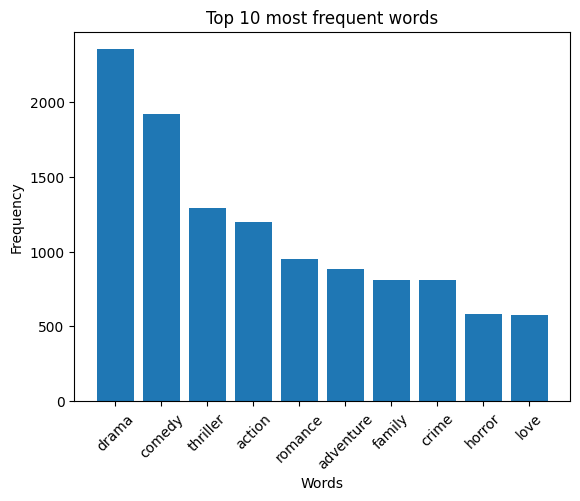

In [ ]:
plt.bar(top10words[:10], top_freqs[:10])
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 10 most frequent words')
plt.show()

In [ ]:
word_freqs = {}
for x in list(pd.DataFrame([top10words, top_freqs]).transpose().apply(lambda row: {row[0]: row[1]}, axis=1)):
    for key, val in x.items():
        word_freqs[key] = val

Visualizing the most frequent words in the processed and combined ````tmdb_keywords_tagline_genres``` dataframe.

(np.float64(-0.5), np.float64(999.5), np.float64(399.5), np.float64(-0.5))

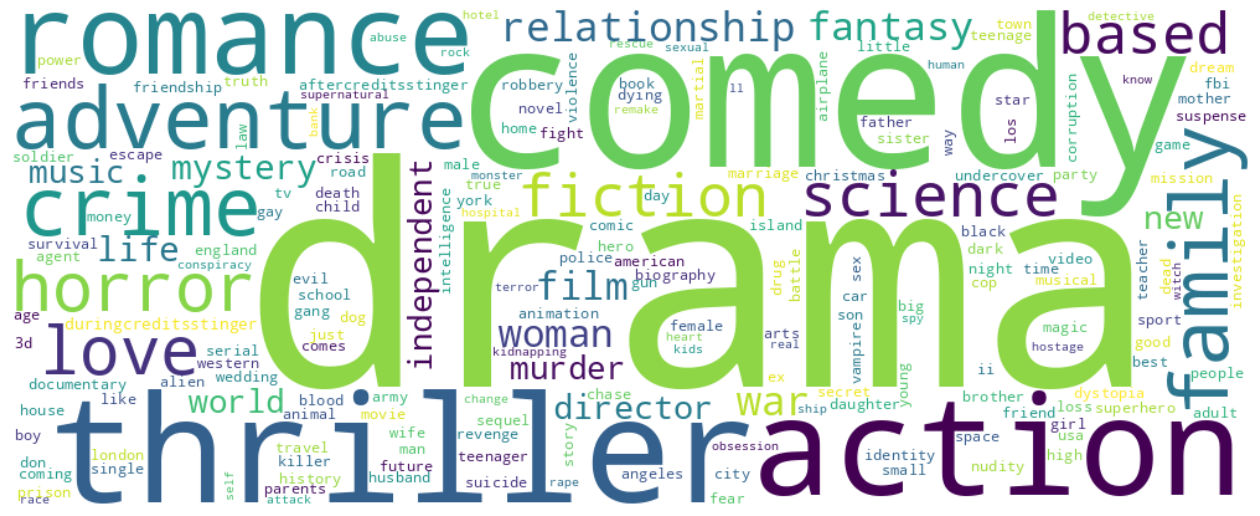

In [ ]:
word_cloud = wordcloud.WordCloud(width=1000, height=400, background_color='white')
word_cloud.generate_from_frequencies(word_freqs)
plt.figure(figsize=(16, 8))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')

Now we use consine similarity to find the similarity. Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. It is often used in natural language processing and information retrieval to measure how similar two documents are based on their content. The value of cosine similarity ranges from -1 to 1, with 1 indicating that the two vectors are identical and 0 indicating that they are completely dissimilar. Higher values of cosine similarity indicate greater similarity between the vectors.


The formula for cosine similarity between two vectors A and B can be expressed as:

cosine_similarity = (A . B) / (||A|| ||B||)

where A . B represents the dot product of A and B, and ||A|| and ||B|| represent the magnitudes of A and B, respectively.

In [ ]:
cosine_results = cosine_similarity(vectorized.toarray())
pd.DataFrame(cosine_results)

,0,1,2,3,4,5,6,7,8,9,...,4799,4800,4801,4802,4803,4804,4805,4806,4807,4808
0,1.000000,0.000000,0.000000,0.024419,0.050016,0.043581,0.083388,0.024419,0.075485,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.065372,0.056614,0.000000,0.0
1,0.000000,1.000000,0.000000,0.025777,0.026398,0.046004,0.198053,0.051554,0.039841,0.054133,...,0.000000,0.000000,0.070491,0.000000,0.122988,0.0,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,1.000000,0.096449,0.049386,0.021517,0.000000,0.000000,0.037268,0.025318,...,0.000000,0.000000,0.000000,0.000000,0.076696,0.0,0.064550,0.000000,0.158114,0.0
3,0.024419,0.025777,0.096449,1.000000,0.071449,0.062257,0.059561,0.046512,0.179721,0.000000,...,0.000000,0.000000,0.063596,0.152499,0.036986,0.0,0.186772,0.053916,0.152499,0.0
4,0.050016,0.026398,0.049386,0.071449,1.000000,0.021253,0.020332,0.047633,0.073621,0.000000,...,0.000000,0.000000,0.032564,0.156174,0.000000,0.0,0.127515,0.110432,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.447214,0.298142,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0
4805,0.065372,0.000000,0.064550,0.186772,0.127515,0.055556,0.000000,0.062257,0.096225,0.000000,...,0.000000,0.000000,0.085126,0.408248,0.099015,0.0,1.000000,0.144338,0.408248,0.0
4806,0.056614,0.000000,0.000000,0.053916,0.110432,0.048113,0.046029,0.107833,0.083333,0.000000,...,0.000000,0.000000,0.073721,0.353553,0.000000,0.0,0.144338,1.000000,0.000000,0.0
4807,0.000000,0.000000,0.158114,0.152499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.242536,0.0,0.408248,0.000000,1.000000,0.0


Now that we have the cosine similarity table for each movie, we can retrieve the movie ID that the user just watched and find its similarity with other movies.

In [ ]:
[result for result in tmdb_keywords_tagline_genres["original_title"] if 'iron' in result.lower()]

['Iron Man',
 'The Man in the Iron Mask',
 'Gridiron Gang',
 'Iron Man 2',
 'The Iron Giant',
 'Ironclad',
 'Iron Man 3',
 'The Iron Lady',
 'The Man with the Iron Fists']

In [ ]:
movie_title = "Iron Man"
movie_index = [index for index, x in enumerate(tmdb_keywords_tagline_genres["original_title"] == movie_title) if x == True][0]

In [ ]:
movie_index

572

Once we obtain the movie index, we can utilize the cosine_similarity matrix to determine the 100 most similar movies to the movie ID that the user watched.

In [ ]:
top_100_movies = sorted(list(enumerate(cosine_results[movie_index])), key=lambda x: x[1], reverse=True)[:100]

In [ ]:
top_100_movies[:10]

[(572, np.float64(1.0)),
 (1589, np.float64(0.6761234037828133)),
 (4003, np.float64(0.6696620080077292)),
 (3709, np.float64(0.6335564128181457)),
 (3993, np.float64(0.5963765795456271)),
 (2865, np.float64(0.5863527298559492)),
 (3989, np.float64(0.5749889084999458)),
 (4525, np.float64(0.5649883385169099)),
 (3147, np.float64(0.5493502655735358)),
 (3806, np.float64(0.5303948353054367))]

In [ ]:
top_movies = pd.DataFrame(np.squeeze(tmdb_keywords_tagline_genres.values[[np.array(top_100_movies)[:, 0].astype(int)]]), columns=tmdb_keywords_tagline_genres.columns)
top_movies.head(101)

,id,original_title,genres_combined,keywords_combined,tagline_processed,keywords_taglines_genres
0,1726,Iron Man,action science fiction adventure,middle east arms dealer malibu marvel comic su...,heroes aren't born. they're built.,action science fiction adventure middle east a...
1,10138,Iron Man 2,adventure action science fiction,malibu marvel comic superhero based on comic b...,"it's not the armor that makes the hero, but th...",adventure action science fiction malibu marvel...
2,102899,Ant-Man,science fiction action adventure,marvel comic superhero based on comic book aft...,heroes don't get any bigger.,science fiction action adventure marvel comic ...
3,68721,Iron Man 3,action adventure science fiction,terrorist war on terror tennessee malibu marve...,unleash the power behind the armor.,action adventure science fiction terrorist war...
4,100402,Captain America: The Winter Soldier,action adventure science fiction,washington d.c. future shield marvel comic sup...,in heroes we trust.,action adventure science fiction washington d....
...,...,...,...,...,...,...
95,15158,Phantasm II,action horror science fiction thriller,portal undertaker evil tall man sentinals,the ball is back!,action horror science fiction thriller portal ...
96,20406,Rockaway,action adventure drama,,,action adventure drama
97,29015,The Specials,action comedy,superhero,,action comedy superhero
98,110402,Трудно быть богом,drama science fiction,,,drama science fiction


So we now have the top 100 recommended movie that similar to the one that watched by the user. We can ignore the first actually, because it's the movie that the user wathced itself.

# 2. Filtering Top 50 Movies from the Top 100 Movies based on their vote counts (raitings) using TfidfVectorizer and calculating the Cosine Similarity

To achieve this, we will use the vote average approach, where the Weighted Rating (WR) is calculated using the formula:

Weighted Rating (WR) = (v / (v + m)) * R + (m / (v + m)) * C

We will now create a new dataframe for this purpose.

In [ ]:
second_filters = top_movies.merge(tmdb_df_cleaned, on="id", how="inner")

In [ ]:
second_filters.head()

,id,original_title_x,genres_combined,keywords_combined,tagline_processed,keywords_taglines_genres,genres,keywords,original_language,original_title_y,...,release_date,runtime,tagline,title,vote_average,vote_count,genres_parsed,release_year,vote_average_str,combined_text
0,1726,Iron Man,action science fiction adventure,middle east arms dealer malibu marvel comic su...,heroes aren't born. they're built.,action science fiction adventure middle east a...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...","[{""id"": 539, ""name"": ""middle east""}, {""id"": 61...",en,Iron Man,...,2008-04-30,126.0,heroes aren't born. they're built.,Iron Man,7.4,8776,"[Action, Science Fiction, Adventure]",2008.0,7.4,Action Science Fiction Adventure heroes aren't...
1,10138,Iron Man 2,adventure action science fiction,malibu marvel comic superhero based on comic b...,"it's not the armor that makes the hero, but th...",adventure action science fiction malibu marvel...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...","[{""id"": 8613, ""name"": ""malibu""}, {""id"": 8828, ...",en,Iron Man 2,...,2010-04-28,124.0,"it's not the armor that makes the hero, but th...",Iron Man 2,6.6,6849,"[Adventure, Action, Science Fiction]",2010.0,6.6,Adventure Action Science Fiction it's not the ...
2,102899,Ant-Man,science fiction action adventure,marvel comic superhero based on comic book aft...,heroes don't get any bigger.,science fiction action adventure marvel comic ...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...","[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Ant-Man,...,2015-07-14,117.0,heroes don't get any bigger.,Ant-Man,7.0,5880,"[Science Fiction, Action, Adventure]",2015.0,7.0,Science Fiction Action Adventure heroes don't ...
3,68721,Iron Man 3,action adventure science fiction,terrorist war on terror tennessee malibu marve...,unleash the power behind the armor.,action adventure science fiction terrorist war...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 949, ""name"": ""terrorist""}, {""id"": 5597...",en,Iron Man 3,...,2013-04-18,130.0,unleash the power behind the armor.,Iron Man 3,6.8,8806,"[Action, Adventure, Science Fiction]",2013.0,6.8,Action Adventure Science Fiction unleash the p...
4,100402,Captain America: The Winter Soldier,action adventure science fiction,washington d.c. future shield marvel comic sup...,in heroes we trust.,action adventure science fiction washington d....,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 521, ""name"": ""washington d.c.""}, {""id""...",en,Captain America: The Winter Soldier,...,2014-03-20,136.0,in heroes we trust.,Captain America: The Winter Soldier,7.6,5764,"[Action, Adventure, Science Fiction]",2014.0,7.6,Action Adventure Science Fiction in heroes we ...


In [ ]:
weight_averaged_method = second_filters[["id", "original_title_x", "vote_average", "vote_count"]]

In [ ]:
tmdb_df_cleaned.head()

,genres,id,keywords,original_language,original_title,overview,release_date,runtime,tagline,title,vote_average,vote_count,genres_parsed,release_year,vote_average_str,combined_text
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"in the 22nd century, a paraplegic marine is di...",2009-12-10,162.0,enter the world of pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]",2009.0,7.2,Action Adventure Fantasy Science Fiction enter...
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha...",2007-05-19,169.0,"at the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]",2007.0,6.9,Adventure Fantasy Action at the end of the wor...
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,a cryptic message from bond’s past sends him o...,2015-10-26,148.0,a plan no one escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]",2015.0,6.3,Action Adventure Crime a plan no one escapes a...
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,following the death of district attorney harve...,2012-07-16,165.0,the legend ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]",2012.0,7.6,Action Crime Drama Thriller the legend ends fo...
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"john carter is a war-weary, former military ca...",2012-03-07,132.0,"lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]",2012.0,6.1,Action Adventure Science Fiction lost in our w...


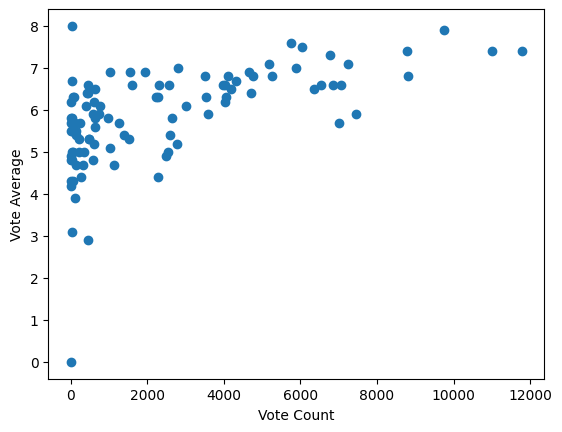

In [ ]:
plt.figure()
plt.scatter(weight_averaged_method.vote_count, weight_averaged_method.vote_average)
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.show()

### Average Movie Ratings

In [ ]:
weight_averaged_method['R'] = weight_averaged_method.vote_average
weight_averaged_method.R

,R
0,7.4
1,6.6
2,7.0
3,6.8
4,7.6
...,...
95,6.3
96,5.8
97,5.5
98,6.7


### Mean vote (ratings) across all movies

In [ ]:
C = weight_averaged_method.R.mean()
print(C)

5.874


### Number of votes (ratings) received by all movies

In [ ]:
weight_averaged_method['v'] = weight_averaged_method.vote_count
weight_averaged_method.v

,v
0,8776
1,6849
2,5880
3,8806
4,5764
...,...
95,94
96,2
97,11
98,41


### Minimum votes (ratings) required for the movie to be considered.

In [ ]:
PERCENTAGE = .95 # set to 95%
m = weight_averaged_method.v.quantile(PERCENTAGE)
print(f"{PERCENTAGE * 100}%", "-", m)

95.0% - 7523.899999999996


### Calculate the weighted average ratings using the provided formula.

We copy the columns ```vote_average``` and ```vote_count``` from our dataframe as new rows named ```R``` and ```v``` so we can use them by combination to calculate the ```WR``` (Weighted Average Rating) which we will also include as a new column to the dataframe.

In [ ]:
weight_averaged_method.head()

,id,original_title_x,vote_average,vote_count,R,v
0,1726,Iron Man,7.4,8776,7.4,8776
1,10138,Iron Man 2,6.6,6849,6.6,6849
2,102899,Ant-Man,7.0,5880,7.0,5880
3,68721,Iron Man 3,6.8,8806,6.8,8806
4,100402,Captain America: The Winter Soldier,7.6,5764,7.6,5764


In [ ]:
def weighted_rating(df, m, C):
    """
    df: a row from the DataFrame containing R and v
    m: minimum votes required to be listed (e.g. 95th percentile)
    C: mean vote across all movies
    """
    v = df['vote_count']
    R = df['vote_average']
    return (v / (v + m)) * R + (m / (v + m)) * C

In [ ]:
weight_averaged_method['WR'] = weight_averaged_method.apply(
    lambda row: weighted_rating(row, m, C),
    axis=1
)

In [ ]:
weight_averaged_method.head()

,id,original_title_x,vote_average,vote_count,R,v,WR
0,1726,Iron Man,7.4,8776,7.4,8776,6.695611
1,10138,Iron Man 2,6.6,6849,6.6,6849,6.219955
2,102899,Ant-Man,7.0,5880,7.0,5880,6.367952
3,68721,Iron Man 3,6.8,8806,6.8,8806,6.373351
4,100402,Captain America: The Winter Soldier,7.6,5764,7.6,5764,6.622701


### Sort the values and pick the highest scores to select the top 50 movies for recommendation.

In [ ]:
weight_averaged_method = weight_averaged_method.sort_values("WR", ascending=False)
weight_averaged_method.reset_index(drop=True, inplace=True)

In [ ]:
top_50_movies = weight_averaged_method.head(50)
top_50_movies

,id,original_title_x,vote_average,vote_count,R,v,WR
0,118340,Guardians of the Galaxy,7.9,9742,7.9,9742,7.017137
1,24428,The Avengers,7.4,11776,7.4,11776,6.805102
2,293660,Deadpool,7.4,10995,7.4,10995,6.780013
3,1726,Iron Man,7.4,8776,7.4,8776,6.695611
4,100402,Captain America: The Winter Soldier,7.6,5764,7.6,5764,6.622701
5,127585,X-Men: Days of Future Past,7.5,6032,7.5,6032,6.597525
6,99861,Avengers: Age of Ultron,7.3,6767,7.3,6767,6.549237
7,271110,Captain America: Civil War,7.1,7241,7.1,7241,6.475255
8,49538,X-Men: First Class,7.1,5181,7.1,5181,6.373957
9,68721,Iron Man 3,6.8,8806,6.8,8806,6.373351


## 2.1 - Saving the Weighted Rating as Model

In [ ]:
from sklearn.base import BaseEstimator

class WeightedRatingRecommender(BaseEstimator):
    def __init__(self, m, C):
        """
        m: minimum votes threshold (e.g. 95th percentile)
        C: mean vote across candidate movies
        """
        self.m = m
        self.C = C

    def fit(self, df):
        """
        df: DataFrame with columns 'id','original_title','vote_average','vote_count'
        """
        self.df_ = df.copy()
        return self

    def recommend(self, top_n=50):
        """
        Compute WR for each row and return top_n titles.
        """
        # Compute Weighted Rating
        v = self.df_['vote_count']
        R = self.df_['vote_average']
        m, C = self.m, self.C
        self.df_['WR'] = (v / (v + m)) * R + (m / (v + m)) * C

        # Sort by WR descending, take top_n
        top = self.df_.sort_values('WR', ascending=False).head(top_n)
        return top[['id','original_title_x']]

# --- Usage ---

# 1) After you compute your 100-candidate DataFrame (second_filters):
candidates = second_filters[['id','original_title_x','vote_average','vote_count']]

# 2) Compute m and C exactly as before:
C = candidates['vote_average'].mean()
m = candidates['vote_count'].quantile(0.95)

# 3) Instantiate and fit
wrr = WeightedRatingRecommender(m=m, C=C).fit(candidates)

# 4) Get top 50
top50 = wrr.recommend(top_n=50)
print(top50)

        id                       original_title_x
13  118340                Guardians of the Galaxy
5    24428                           The Avengers
20  293660                               Deadpool
0     1726                               Iron Man
4   100402    Captain America: The Winter Soldier
21  127585             X-Men: Days of Future Past
6    99861                Avengers: Age of Ultron
7   271110             Captain America: Civil War
22   49538                     X-Men: First Class
3    68721                             Iron Man 3
2   102899                                Ant-Man
92  157350                              Divergent
79     557                             Spider-Man
9    76338                   Thor: The Dark World
12    1771     Captain America: The First Avenger
1    10138                             Iron Man 2
15   10195                                   Thor
8    36657                                  X-Men
57   13183                               Watchmen


In [ ]:
with open('weighted_rating_recommender.pkl', 'wb') as f:
    pickle.dump(wrr, f)

print("✅ WeightedRatingRecommender saved to weighted_rating_recommender.pkl")

✅ WeightedRatingRecommender saved to weighted_rating_recommender.pkl


# 3. Filtering Movies based on Content Similarity by 'overview'

In [ ]:
contentbased = top_50_movies.merge(tmdb_df_cleaned[["id", "overview"]], on="id", how="inner")[["id", "original_title_x", "overview"]]
contentbased.columns = ["id", "original_title", "overview"]
contentbased.head()

,id,original_title,overview
0,118340,Guardians of the Galaxy,"light years from earth, 26 years after being a..."
1,24428,The Avengers,when an unexpected enemy emerges and threatens...
2,293660,Deadpool,deadpool tells the origin story of former spec...
3,1726,Iron Man,"after being held captive in an afghan cave, bi..."
4,100402,Captain America: The Winter Soldier,after the cataclysmic events in new york with ...


**NOTE: To ensure that the user's watched movie is among the top 50, we will manually add it if it is not already there, as we need its overview for comparison.**

*It appears that the movie is already included, as indicated by the "true" output.*

In [ ]:
check_movie_exist = True in list(contentbased.original_title == movie_title)
check_movie_exist

True

*If the movie is not present in the list, we can add it manually.*

In [ ]:
add_title = tmdb_df_cleaned[["id", "original_title", "overview"]][tmdb_df_cleaned[["id", "original_title", "overview"]].original_title == movie_title]
add_title

,id,original_title,overview
68,1726,Iron Man,"after being held captive in an afghan cave, bi..."


In [ ]:
contentbased.head()

,id,original_title,overview
0,118340,Guardians of the Galaxy,"light years from earth, 26 years after being a..."
1,24428,The Avengers,when an unexpected enemy emerges and threatens...
2,293660,Deadpool,deadpool tells the origin story of former spec...
3,1726,Iron Man,"after being held captive in an afghan cave, bi..."
4,100402,Captain America: The Winter Soldier,after the cataclysmic events in new york with ...


In [ ]:
if not check_movie_exist:
    contentbased = pd.concat([contentbased, add_title])
    contentbased = contentbased.reset_index(drop=True)

**NOTE: In this scenario, we need to ensure and eliminate any numbers or symbols from the overview sentences and convert them all to lowercase.**

In [ ]:
def func(row):
    text = row.overview.lower()
    text = ' '.join(re.findall(r"[a-z]+", text))
    return text

In [ ]:
contentbased["overview_cleaned"] = contentbased.apply(func, axis=1)
contentbased.head()

,id,original_title,overview,overview_cleaned
0,118340,Guardians of the Galaxy,"light years from earth, 26 years after being a...",light years from earth years after being abduc...
1,24428,The Avengers,when an unexpected enemy emerges and threatens...,when an unexpected enemy emerges and threatens...
2,293660,Deadpool,deadpool tells the origin story of former spec...,deadpool tells the origin story of former spec...
3,1726,Iron Man,"after being held captive in an afghan cave, bi...",after being held captive in an afghan cave bil...
4,100402,Captain America: The Winter Soldier,after the cataclysmic events in new york with ...,after the cataclysmic events in new york with ...


**Proceed with extracting the features**

*The main difference between CountVectorizer and TfidfVectorizer is that CountVectorizer only counts the occurrences of each word in the document, while TfidfVectorizer considers the frequency of a word across all documents. TfidfVectorizer is better at identifying the most important words in a document or a corpus.*

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_features = tfidf.fit_transform(contentbased.overview_cleaned)

In [ ]:
tfidf_features.toarray()

array([[0.25303086, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.16593579, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**Computing Cosine Similarity between tfidf_features**

In [ ]:
cosine_similarity_tables = cosine_similarity(tfidf_features)

In [ ]:
pd.DataFrame(cosine_similarity_tables)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,0.032456,0.000000,0.000000,0.000000,0.000000,0.025201,0.000000,0.046405,0.000000,...,0.086723,0.000000,0.026416,0.000000,0.000000,0.000000,0.027387,0.000000,0.000000,0.028633
1,0.032456,1.000000,0.000000,0.000000,0.068939,0.000000,0.114992,0.012332,0.045644,0.017217,...,0.000000,0.000000,0.046619,0.000000,0.026767,0.000000,0.000000,0.000000,0.000000,0.023625
2,0.000000,0.000000,1.000000,0.000000,0.024825,0.023796,0.000000,0.009240,0.027888,0.000000,...,0.009023,0.000000,0.000000,0.000000,0.000000,0.018037,0.068104,0.021554,0.018747,0.011394
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.101855,0.000000,0.000000,0.100963,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013836,0.000000,0.000000
4,0.000000,0.068939,0.024825,0.000000,1.000000,0.017653,0.067803,0.158769,0.033595,0.050468,...,0.063391,0.020109,0.000000,0.000000,0.078810,0.000000,0.016182,0.020553,0.000000,0.022382
5,0.000000,0.000000,0.023796,0.000000,0.017653,1.000000,0.062314,0.073684,0.070076,0.000000,...,0.000000,0.000000,0.027280,0.000000,0.000000,0.019035,0.000000,0.039974,0.000000,0.016373
6,0.025201,0.114992,0.000000,0.101855,0.067803,0.062314,1.000000,0.083024,0.022334,0.066812,...,0.020869,0.023944,0.000000,0.000000,0.000000,0.000000,0.000000,0.030501,0.000000,0.032997
7,0.000000,0.012332,0.009240,0.000000,0.158769,0.073684,0.083024,1.000000,0.013245,0.017697,...,0.039295,0.000000,0.000000,0.000000,0.031333,0.008958,0.021965,0.023157,0.024244,0.000000
8,0.046405,0.045644,0.027888,0.000000,0.033595,0.070076,0.022334,0.013245,1.000000,0.018493,...,0.025787,0.000000,0.026662,0.000000,0.000000,0.037177,0.014739,0.006137,0.000000,0.000000
9,0.000000,0.017217,0.000000,0.100963,0.050468,0.000000,0.066812,0.017697,0.018493,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**Retrieve the movie index that we want to examine from the similarity table.**

*It's worth noting that each row in the table contains the similarities of that particular row to all the available movies in the table.*

In [ ]:
movie_index = [index for index, x in enumerate(contentbased["original_title"] == movie_title) if x == True][0]
movie_index

3

In [ ]:
top_movies = pd.DataFrame(list(sorted(enumerate(cosine_similarity_tables[movie_index]), key=lambda x: x[1], reverse=True)))
top_movies.columns = ["top_index", "cosine_similarity"]
top_movies.head(15)

,top_index,cosine_similarity
0,3,1.000000
1,15,0.133516
2,6,0.101855
3,9,0.100963
4,10,0.036396
5,22,0.033701
6,19,0.031284
7,47,0.013836
8,0,0.000000
9,1,0.000000


In [ ]:
top_15_movies = pd.DataFrame(contentbased[["id", "original_title"]].values[top_movies.top_index[:16]], columns=["id", "original_title"])

In [ ]:
print(f"The movies related to the {movie_title} movie that the user just watched are ...\n", top_15_movies.values[1:])

The movies related to the Iron Man movie that the user just watched are ...
 [[10138 'Iron Man 2']
 [99861 'Avengers: Age of Ultron']
 [68721 'Iron Man 3']
 [102899 'Ant-Man']
 [1858 'Transformers']
 [558 'Spider-Man 2']
 [333355 'Star Wars: Clone Wars (Volume 1)']
 [118340 'Guardians of the Galaxy']
 [24428 'The Avengers']
 [293660 'Deadpool']
 [100402 'Captain America: The Winter Soldier']
 [127585 'X-Men: Days of Future Past']
 [271110 'Captain America: Civil War']
 [49538 'X-Men: First Class']
 [157350 'Divergent']]


## 3.1 - Saving the Content Based ```overview``` Model

**NOTE**: Before saving the last trained model we check if the output of our first two models, one is the model which recommends movies using combined_text feature (consisting of ```tagline```, ```keywords``` and ```genre``` data) and the other is the model which recommends movies using their vote_counts (ratings). And here we have to be sure that the results are correct because we will combine their results and fit them into our last model which will additional use the ```overview_cleaned``` data.

In [ ]:
# 1) Original notebook with version 1.2 and current Top100 DataFrame version:
#    The DataFrame is located next to “top_movies” and is:
#    columns: ['id','original_title', ... , 'keywords_taglines_genres']
top100 = weight_averaged_method[['id', 'original_title_x', 'vote_average', 'vote_count']].copy()

# 2) Calculate the C and m values ​​as in the original notebook:
C = top100['vote_average'].mean()                # Average vote score
m = top100['vote_count'].quantile(0.95)          # 95% of the population

# 3) Use the WeightedRatingRecommender class:

class WeightedRatingRecommender(BaseEstimator):
    def __init__(self, m, C):
        self.m = m
        self.C = C

    def fit(self, df):
        self.df_ = df.copy()
        return self

    def recommend(self, top_n=50):
        df = self.df_
        v = df['vote_count']
        R = df['vote_average']
        m, C = self.m, self.C
        df['WR'] = (v/(v+m))*R + (m/(v+m))*C
        return df.sort_values('WR', ascending=False).head(top_n)

# 4) Train model and show top50 recommendations
wrr = WeightedRatingRecommender(m, C).fit(top100)
top50 = wrr.recommend(top_n=50)

# 5) Control output
print("Iron Man top50 içinde mi?", "Iron Man" in top50['original_title_x'].values)
print("Top50 titles:", top50['original_title_x'].tolist())

Iron Man top50 içinde mi? True
Top50 titles: ['Guardians of the Galaxy', 'The Avengers', 'Deadpool', 'Iron Man', 'Captain America: The Winter Soldier', 'X-Men: Days of Future Past', 'Avengers: Age of Ultron', 'Captain America: Civil War', 'X-Men: First Class', 'Iron Man 3', 'Ant-Man', 'Divergent', 'Spider-Man', 'Thor: The Dark World', 'Captain America: The First Avenger', 'Iron Man 2', 'Thor', 'X-Men', 'Watchmen', 'Spider-Man 2', 'X2', 'Man of Steel', 'Transformers', 'The Hunger Games: Mockingjay - Part 2', 'The Amazing Spider-Man 2', 'Unbreakable', 'X-Men: Apocalypse', 'Star Trek Beyond', 'Equilibrium', "Ender's Game", 'The Wolverine', 'X-Men: The Last Stand', '2 Guns', 'Superman', 'X-Men Origins: Wolverine', 'Warcraft', 'Kick-Ass 2', 'The Incredible Hulk', 'Superman II', 'Super', 'Star Trek: Generations', 'Star Trek III: The Search for Spock', 'Repo Men', 'The Punisher', 'Suicide Squad', 'Astro Boy', 'Spider-Man 3', 'Star Wars: Clone Wars (Volume 1)', 'Phantasm II', 'Трудно быть бого

In [ ]:
# 3) Cleaned Overview
contentbased = top_50_movies.merge(tmdb_df_cleaned[["id", "overview"]], on="id", how="inner")[["id", "original_title_x", "overview"]]
contentbased.columns = ["id", "original_title", "overview"]
contentbased['overview_cleaned'] = contentbased['overview'].str.lower().str.replace(r'[^a-z ]',' ',regex=True)

# 4) TF–IDF + cosine similarity
vec_ov = TfidfVectorizer(stop_words='english')
mat_ov = vec_ov.fit_transform(contentbased['overview_cleaned'])
sim_ov = cosine_similarity(mat_ov, mat_ov)
indices50 = pd.Series(contentbased.index, index=contentbased['original_title'])

# 5) Top15 Recommendations
idx = indices50['Iron Man']
scores = sorted(list(enumerate(sim_ov[idx])), key=lambda x: x[1], reverse=True)[1:16]
rec15 = [contentbased.iloc[i]['original_title'] for i,_ in scores]
print("Top 15 Movies:", rec15)

Top 15 Movies: ['Iron Man 2', 'Avengers: Age of Ultron', 'Iron Man 3', 'Ant-Man', 'Transformers', 'Spider-Man 2', 'Star Wars: Clone Wars (Volume 1)', 'Guardians of the Galaxy', 'The Avengers', 'Deadpool', 'Captain America: The Winter Soldier', 'X-Men: Days of Future Past', 'Captain America: Civil War', 'X-Men: First Class', 'Divergent']


In [ ]:
# 1) Create contentbased DataFrame with necessary columns
contentbased_df = contentbased[['id', 'original_title', 'overview_cleaned']].reset_index(drop=True)

# 2) Define the recommender class
class ContentBasedRecommender:
    def __init__(self, stop_words='english'):
        self.vectorizer = TfidfVectorizer(stop_words=stop_words)

    def fit(self, df):
        """
        df: DataFrame with columns 'id', 'original_title', 'overview_cleaned'
        """
        self.df = df.copy()
        # Fill NaNs
        self.df['overview_cleaned'] = self.df['overview_cleaned'].fillna('')
        # Fit TF-IDF matrix
        self.mat = self.vectorizer.fit_transform(self.df['overview_cleaned'])
        # Precompute similarity
        self.cosine_sim = cosine_similarity(self.mat, self.mat)
        # Create index mapping
        self.indices = pd.Series(self.df.index, index=self.df['original_title'])
        return self

    def recommend(self, title, top_n=15):
        """
        Returns DataFrame of top_n recommendations with id and original_title
        """
        if title not in self.indices:
            return pd.DataFrame(columns=['id', 'original_title'])
        idx = self.indices[title]
        # enumerate similarity scores
        sim_scores = list(enumerate(self.cosine_sim[idx]))
        # sort and pick top_n excluding itself
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
        rec_idxs = [i for i,_ in sim_scores]
        return self.df.loc[rec_idxs, ['id', 'original_title']]

In [ ]:
# 3) Instantiate and train the model
rec_model = ContentBasedRecommender()
rec_model.fit(contentbased_df)

# 4) Get recommendations
top15 = rec_model.recommend('Iron Man', top_n=15)
print("Top 15 Recommendations for 'Iron Man':")
print(top15)

# 5) (Optionally) save the model
with open('content_based_recommender.pkl', 'wb') as f:
    pickle.dump(rec_model, f)
print("✅ ContentBasedRecommender saved as content_based_recommender.pkl")

Top 15 Recommendations for 'Iron Man':
        id                       original_title
15   10138                           Iron Man 2
6    99861              Avengers: Age of Ultron
9    68721                           Iron Man 3
10  102899                              Ant-Man
22    1858                         Transformers
19     558                         Spider-Man 2
47  333355     Star Wars: Clone Wars (Volume 1)
0   118340              Guardians of the Galaxy
1    24428                         The Avengers
2   293660                             Deadpool
4   100402  Captain America: The Winter Soldier
5   127585           X-Men: Days of Future Past
7   271110           Captain America: Civil War
8    49538                   X-Men: First Class
11  157350                            Divergent
✅ ContentBasedRecommender saved as content_based_recommender.pkl
